# FILER `get_metadata` endpoint in Jupyter


2021 April 13 FILER API ppt slide #6-7

<div>
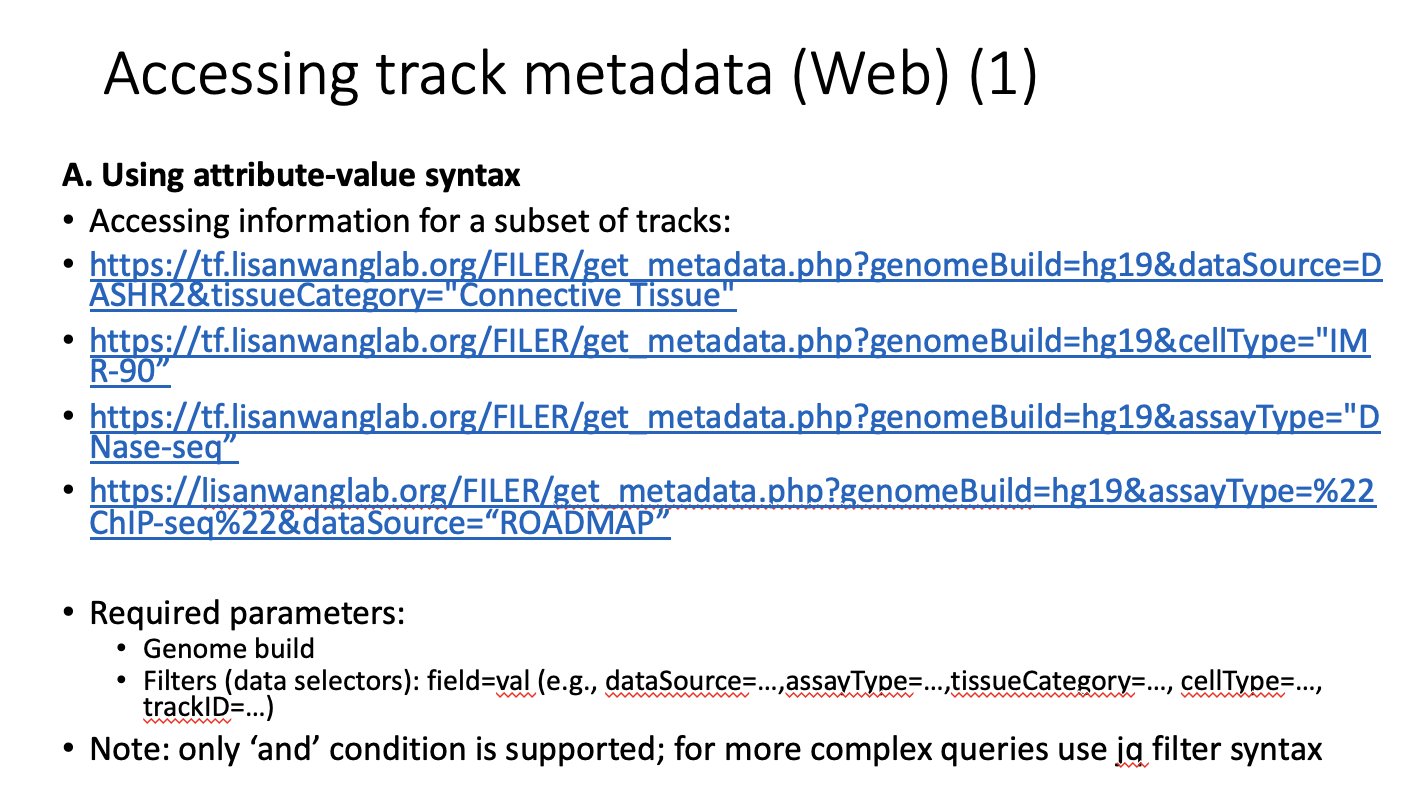
</div>  


<div>
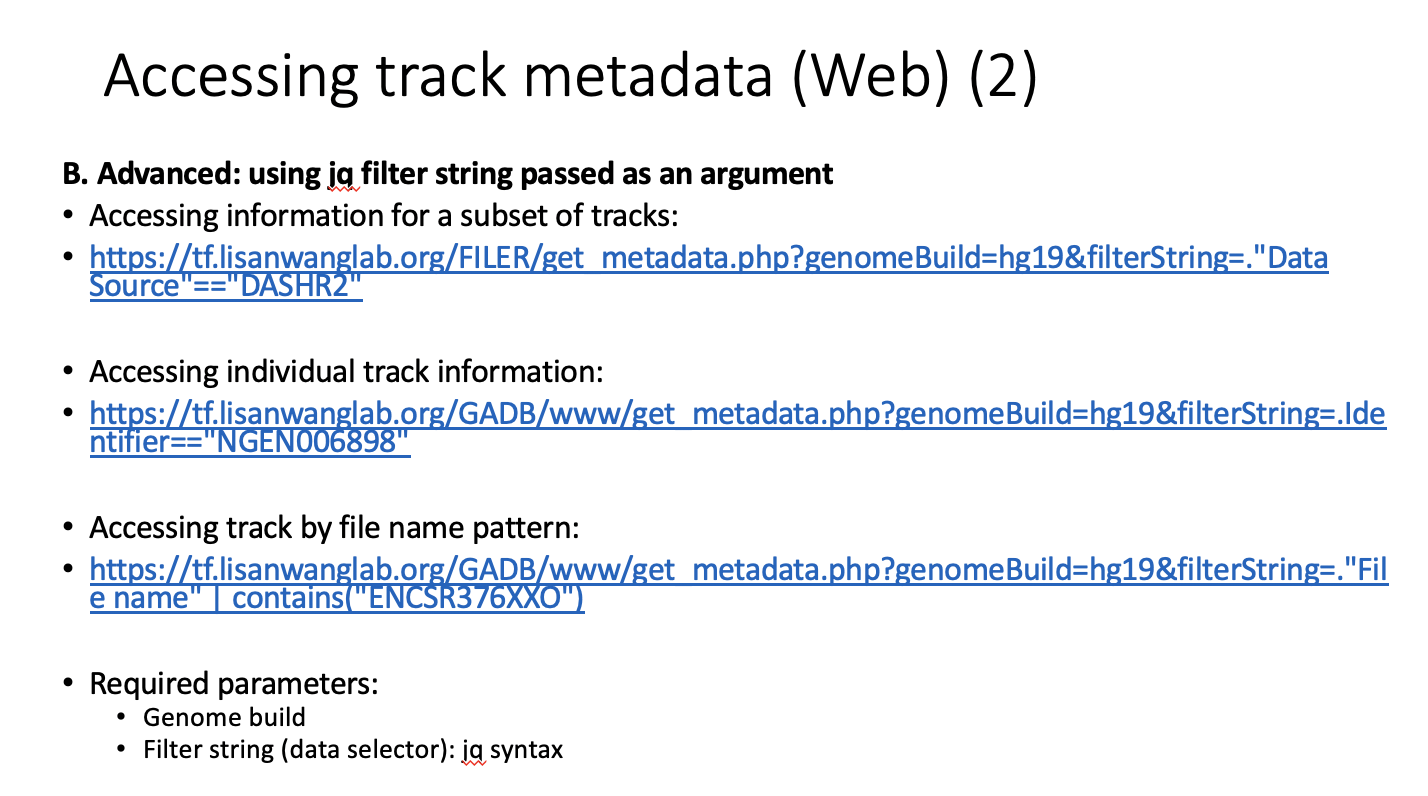
</div>  


### API variables

In [ ]:
requestURL = 'https://tf.lisanwanglab.org/FILER'
endpoint = 'get_metadata.php'

### Setup

Imports

In [2]:
import urllib.parse
import json, requests, pprint
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Helper functions

In [3]:
def get_query_url(requestURL, endpoint):
    return ''.join([requestURL, '/', endpoint, '?'])


def process_request(requestUri, payload=None):
    ''' process request '''
    
    response = requests.get(requestUri, params=payload)
    rjson = None
    
    if response:
        print('Success!')
    else:
        print('An error has occurred:' + str(response.status_code))
    
    try: 
        rjson = response.json()
        print('Response JSON decoded')
    except ValueError:
        print('Error occurred: response JSON decode failed')
        print('response.content =\t', response.content.decode())
    
    return rjson


<br>  

### get endpoint URL 

In [4]:
_url_endpoint = get_query_url(requestURL, endpoint)

print(_url_endpoint)

https://tf.lisanwanglab.org/FILER/get_metadata.php?


<br>  

## FILER API request - simple example 

#### API request

In [5]:
## example query params
_params = {
    'genomeBuild':'hg19', 
    'dataSource':'ROADMAP', 
    'assayType':'ChIP-seq'
}


## process API request
rjson = process_request(_url_endpoint, _params)


## display response
print("Response length =\t", len(rjson))
print("Response type =\t ", type(rjson))
if isinstance(rjson, list):
    pprint.pprint(rjson[:2])
else:
    pprint.pprint(rjson)

Success!
Response JSON decoded
Response length =	 4800
Response type =	  <class 'list'>
[{'Antibody': 'consolidated',
  'Assay': 'ChIP-seq',
  'Biological replicate(s)': 'Not applicable',
  'Biosample type': 'cell line',
  'Biosamples term id': 'Not applicable',
  'Data Category': 'Genomic annotation',
  'Data Source': 'ROADMAP',
  'Date added to GADB': '8/25/2018',
  'Downloaded date': '8/15/2018',
  'ENCODE Experiment id': 'Not applicable',
  'File format': 'bed bed4',
  'File name': 'E114_15_coreMarks_mnemonics.bed.gz',
  'File size': 2685062,
  'Genome build': 'hg19',
  'Identifier': 'NGRM005136',
  'Link out URL': 'http://www.roadmapepigenomics.org/',
  'Number of intervals': 464406,
  'Output type': 'ChromHMM',
  'Processed File Download URL': 'https://tf.lisanwanglab.org/GADB/Annotationtracks/RoadMap/ChIP-seq/bed4/hg19/E114_15_coreMarks_mnemonics.bed.gz',
  'Processed file md5': '5420560442f55c16af53adee779335a7',
  'Raw File URL': 'https://egg2.wustl.edu/roadmap/data/byFileType

#### Convert response list of json dicts to Pandas DataFrame

In [6]:
if isinstance(rjson, list):
    df = pd.DataFrame(rjson)
else:
    df = pd.DataFrame.from_dict(rjson, orient='index').T

df.shape
df.head()
df.columns

(4800, 34)

,Identifier,Data Source,File name,Number of intervals,bp covered,Output type,Genome build,cell type,Biosample type,Biosamples term id,...,wget command,tabix_index Download,Link out URL,Raw File URL,Raw file download,Raw file md5,Data Category,classification,original cell type name,system category
0,NGRM005136,ROADMAP,E114_15_coreMarks_mnemonics.bed.gz,464406,3095691400,ChromHMM,hg19,A549,cell line,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://www.roadmapepigenomics.org/,https://egg2.wustl.edu/roadmap/data/byFileType...,wget https://tf.lisanwanglab.org/GADB/Annotati...,aa2593297c6a204e246dfa9d048264c3,Genomic annotation,ChIP-seq consolidated ChromHMM,A549 EtOH 0.02pct Lung Carcinoma Cell Line,Respiratory
1,NGRM000001,ROADMAP,BI.Adipose_Derived_Mesenchymal_Stem_Cell_Cultu...,314335,638569711,peaks,hg19,Adipose derived mesenchymal stem cell cultured...,primary culture,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://www.roadmapepigenomics.org/,https://egg2.wustl.edu/roadmap/data/byFileType...,wget https://tf.lisanwanglab.org/GADB/Annotati...,83081311e03816f3f378c2ce0322fd12,Called peaks,ChIP-seq H3K27me3-histone-mark peaks,Adipose Derived Mesenchymal Stem Cell Cultured...,Stem Cell
2,NGRM000002,ROADMAP,BI.Adipose_Derived_Mesenchymal_Stem_Cell_Cultu...,246949,633497236,peaks,hg19,Adipose derived mesenchymal stem cell cultured...,primary culture,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://www.roadmapepigenomics.org/,https://egg2.wustl.edu/roadmap/data/byFileType...,wget https://tf.lisanwanglab.org/GADB/Annotati...,b4ff5876548ab74f372176064f21a41b,Called peaks,ChIP-seq H3K27me3-histone-mark peaks,Adipose Derived Mesenchymal Stem Cell Cultured...,Stem Cell
3,NGRM000003,ROADMAP,BI.Adipose_Derived_Mesenchymal_Stem_Cell_Cultu...,142627,384808260,peaks,hg19,Adipose derived mesenchymal stem cell cultured...,primary culture,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://www.roadmapepigenomics.org/,https://egg2.wustl.edu/roadmap/data/byFileType...,wget https://tf.lisanwanglab.org/GADB/Annotati...,4091767a6a2361b6a1549bd75fbca4f7,Called peaks,ChIP-seq H3K36me3-histone-mark peaks,Adipose Derived Mesenchymal Stem Cell Cultured...,Stem Cell
4,NGRM000004,ROADMAP,BI.Adipose_Derived_Mesenchymal_Stem_Cell_Cultu...,106090,471110943,peaks,hg19,Adipose derived mesenchymal stem cell cultured...,primary culture,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://www.roadmapepigenomics.org/,https://egg2.wustl.edu/roadmap/data/byFileType...,wget https://tf.lisanwanglab.org/GADB/Annotati...,d8deb6ec4ad8e7840251fb14d1adfbab,Called peaks,ChIP-seq H3K36me3-histone-mark peaks,Adipose Derived Mesenchymal Stem Cell Cultured...,Stem Cell


Index(['Identifier', 'Data Source', 'File name', 'Number of intervals',
       'bp covered', 'Output type', 'Genome build', 'cell type',
       'Biosample type', 'Biosamples term id', 'Tissue category',
       'ENCODE Experiment id', 'Biological replicate(s)',
       'Technical replicate', 'Antibody', 'Assay', 'File format', 'File size',
       'filepath', 'Downloaded date', 'Release date', 'Date added to GADB',
       'Processed File Download URL', 'Processed file md5', 'wget command',
       'tabix_index Download', 'Link out URL', 'Raw File URL',
       'Raw file download', 'Raw file md5', 'Data Category', 'classification',
       'original cell type name', 'system category'],
      dtype='object')

<br>  

## FILER API request - example with `filterString`

#### API request

In [7]:
## example query params - with filterString
_params2 = {
    'genomeBuild':'hg19', 
    'filterString':'."File name" | contains("ENCSR376XXO")' 
}


## process API request
rjson2 = process_request(_url_endpoint, _params2)


## display response
print("Response length =\t", len(rjson2))
print("Response type =\t ", type(rjson2))
if isinstance(rjson2, list):
    pprint.pprint(rjson2[:2])
else:
    pprint.pprint(rjson2)

Success!
Response JSON decoded
Response length =	 4
Response type =	  <class 'list'>
[{'Antibody': 'Not applicable',
  'Assay': 'short total RNA-Seq',
  'Biological replicate(s)': 'Not applicable',
  'Biosample type': 'immortalized cell line',
  'Biosamples term id': 'Not applicable',
  'Data Category': 'Called peaks',
  'Data Source': 'DASHR2',
  'Date added to GADB': '7/1/2018',
  'Downloaded date': '6/30/2018',
  'ENCODE Experiment id': 'Not applicable',
  'File format': 'bed bed6+DASHR',
  'File name': 'A375-rep1_ENCSR376XXO_peaks_annot.bed.gz',
  'File size': 276558,
  'Genome build': 'hg19',
  'Identifier': 'NGDS000305',
  'Link out URL': 'http://dashr2.lisanwanglab.org/index.php',
  'Number of intervals': 2613,
  'Output type': 'annotated peaks',
  'Processed File Download URL': 'https://tf.lisanwanglab.org/GADB/Annotationtracks/DASHRv2/short_total_RNA-seq/hg19/ENCODE_dataportal_hg19/A375-rep1_ENCSR376XXO_peaks_annot.bed.gz',
  'Processed file md5': 'afc1f3ce10dc2487c6b256b8f8b3

#### Convert response list of json dicts to Pandas DataFrame

In [8]:
if isinstance(rjson2, list):
    df2 = pd.DataFrame(rjson2)
else:
    df2 = pd.DataFrame.from_dict(rjson2, orient='index').T

df2.shape
df2.head()
df2.columns

(4, 34)

,Identifier,Data Source,File name,Number of intervals,bp covered,Output type,Genome build,cell type,Biosample type,Biosamples term id,...,wget command,tabix_index Download,Link out URL,Raw File URL,Raw file download,Raw file md5,Data Category,classification,original cell type name,system category
0,NGDS000305,DASHR2,A375-rep1_ENCSR376XXO_peaks_annot.bed.gz,2613,103970,annotated peaks,hg19,A375,immortalized cell line,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://dashr2.lisanwanglab.org/index.php,http://dashr2.lisanwanglab.org/table2csv.php?d...,wget https://tf.lisanwanglab.org/GADB/Annotati...,d95c2513b2c5ef7317bc4fad64a48df9,Called peaks,short total RNA-Seq annotated peaks,A375 (melanoma cell line) replicate 1,Integumentary
1,NGDS000306,DASHR2,A375-rep1_ENCSR376XXO_peaks_unannot.bed.gz,20625,444946,unannotated peaks,hg19,A375,immortalized cell line,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://dashr2.lisanwanglab.org/index.php,http://dashr2.lisanwanglab.org/table2csv.php?d...,wget https://tf.lisanwanglab.org/GADB/Annotati...,aaaf1e1dcd5462174a42e4cd08e36c89,Called peaks,short total RNA-Seq unannotated peaks,A375 (melanoma cell line) replicate 1,Integumentary
2,NGDS000307,DASHR2,A375-rep2_ENCSR376XXO_peaks_annot.bed.gz,2539,99658,annotated peaks,hg19,A375,immortalized cell line,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://dashr2.lisanwanglab.org/index.php,http://dashr2.lisanwanglab.org/table2csv.php?d...,wget https://tf.lisanwanglab.org/GADB/Annotati...,dae97397cd75edf8e545a60f38d7bb30,Called peaks,short total RNA-Seq annotated peaks,A375 (melanoma cell line) replicate 1,Integumentary
3,NGDS000308,DASHR2,A375-rep2_ENCSR376XXO_peaks_unannot.bed.gz,20963,473377,unannotated peaks,hg19,A375,immortalized cell line,Not applicable,...,wget https://tf.lisanwanglab.org/GADB/Annotati...,wget https://tf.lisanwanglab.org/GADB/Annotati...,http://dashr2.lisanwanglab.org/index.php,http://dashr2.lisanwanglab.org/table2csv.php?d...,wget https://tf.lisanwanglab.org/GADB/Annotati...,01d59d3689419d8f30fceb5d6ad431d8,Called peaks,short total RNA-Seq unannotated peaks,A375 (melanoma cell line) replicate 1,Integumentary


Index(['Identifier', 'Data Source', 'File name', 'Number of intervals',
       'bp covered', 'Output type', 'Genome build', 'cell type',
       'Biosample type', 'Biosamples term id', 'Tissue category',
       'ENCODE Experiment id', 'Biological replicate(s)',
       'Technical replicate', 'Antibody', 'Assay', 'File format', 'File size',
       'filepath', 'Downloaded date', 'Release date', 'Date added to GADB',
       'Processed File Download URL', 'Processed file md5', 'wget command',
       'tabix_index Download', 'Link out URL', 'Raw File URL',
       'Raw file download', 'Raw file md5', 'Data Category', 'classification',
       'original cell type name', 'system category'],
      dtype='object')